In [28]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error

In [29]:
#Ler csv
df = pd.read_csv('csv/titanic.csv')

#Obter detalhes do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [30]:
#Verificar nulos
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [31]:
df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


<AxesSubplot:>

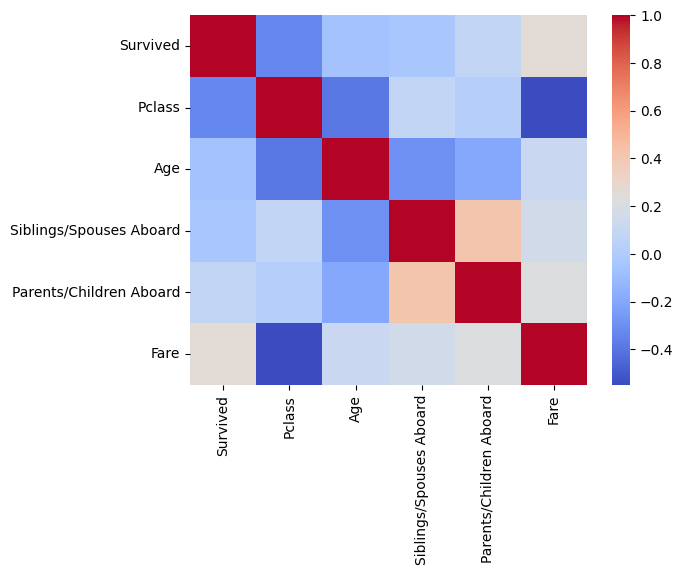

In [32]:
sns.heatmap(df.corr(), cmap="coolwarm")

In [33]:
#Definicao de variaveis e alvo
X = df[['Age', 'Pclass', 'Siblings/Spouses Aboard','Parents/Children Aboard']]
y = df['Survived']

In [34]:
#Criacao do modelo 1
model1 = DecisionTreeClassifier(random_state=0)

model1.fit(X,y)

y_model1_predict = model1.predict(X)

accuracy = accuracy_score(y,y_model1_predict)
mae = mean_absolute_error(y,y_model1_predict)

print("accuracy: ", accuracy)
print("mae: ", mae)

accuracy:  0.8478015783540023
mae:  0.15219842164599776


In [35]:
#Criacao do modelo 2
model2 = RandomForestClassifier(random_state=0)

model2.fit(X,y)

y_model2_predict = model2.predict(X)

accuracy = accuracy_score(y,y_model2_predict)
mae = mean_absolute_error(y,y_model2_predict)

print("accuracy: ", accuracy)
print("mae: ", mae)

accuracy:  0.8478015783540023
mae:  0.15219842164599776


In [36]:
#Criacao do modelo 3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model3 = DecisionTreeClassifier(random_state=0)

model3.fit(X_train,y_train)

y_model3_predict = model3.predict(X_test)

accuracy = accuracy_score(y_test,y_model3_predict)
mae = mean_absolute_error(y_test,y_model3_predict)

print("accuracy: ", accuracy)
print("mae: ", mae)

accuracy:  0.6576576576576577
mae:  0.34234234234234234


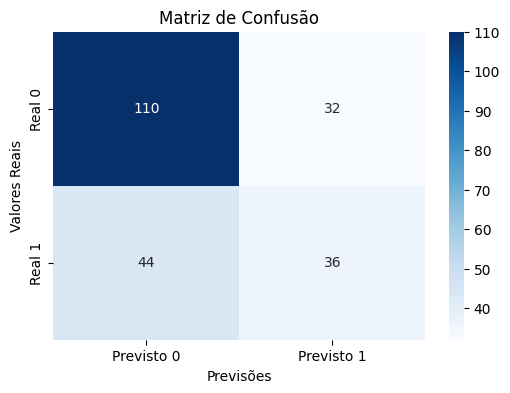

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_model3_predict)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Previsto 0", "Previsto 1"], yticklabels=["Real 0", "Real 1"])
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()


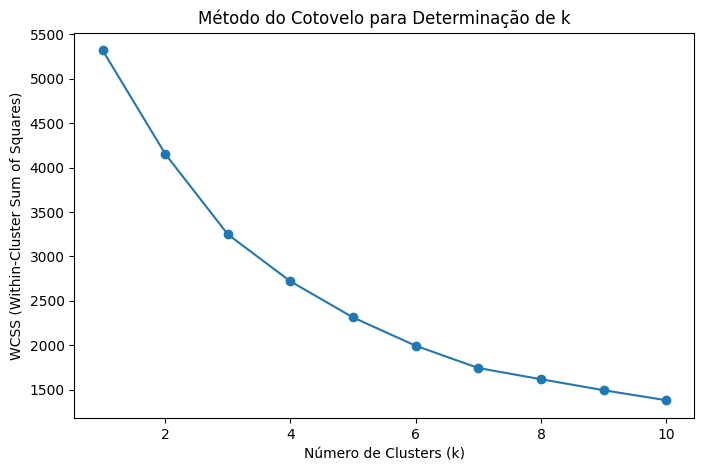

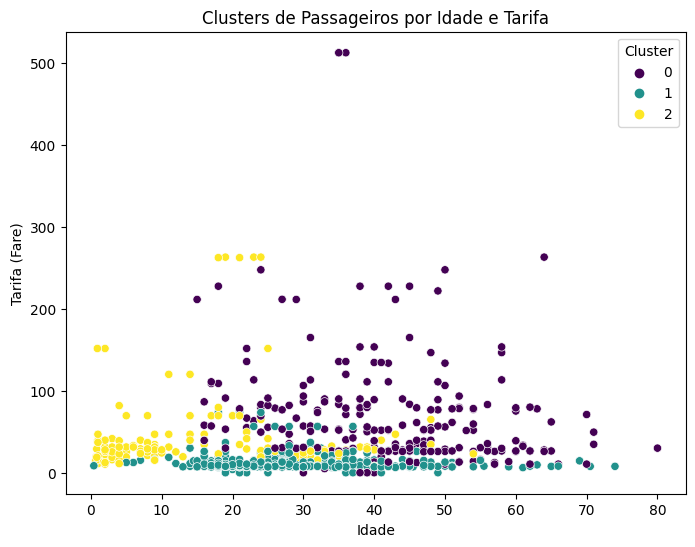

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados (substitua pelo seu próprio DataFrame)
# df = pd.read_csv('seu_arquivo.csv') # Se os dados estiverem em um CSV

# Supondo que você já tenha o DataFrame carregado como 'df'

# Preparar os dados: Selecionar colunas numéricas e codificar variáveis categóricas
df_processed = df.copy()
df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})  # Codificar o sexo como 0 e 1

# Selecionar apenas as colunas numéricas para o K-means
features = df_processed[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]

# Escalonar os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Método do cotovelo para encontrar o número ideal de clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Método do Cotovelo para Determinação de k")
plt.show()

# Escolher o número de clusters (por exemplo, k=3) com base no gráfico do cotovelo
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
df_processed['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizar a distribuição dos clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_processed, x='Age', y='Fare', hue='Cluster', palette='viridis')
plt.title("Clusters de Passageiros por Idade e Tarifa")
plt.xlabel("Idade")
plt.ylabel("Tarifa (Fare)")
plt.legend(title="Cluster")
plt.show()
